In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

from SSMuLA.landscape_global import hamming

In [5]:
df = pd.read_csv("data/GB1/scale2max/GB1.csv")

In [6]:
df.head()

,AAs,AA1,AA2,AA3,AA4,fitness,active,muts,n_mut
0,VDGV,V,D,G,V,0.114130,True,WT,1
1,ADGV,A,D,G,V,0.007066,True,V39A,1
2,CDGV,C,D,G,V,0.027646,True,V39C,1
3,DDGV,D,D,G,V,0.000739,False,V39D,1
4,EDGV,E,D,G,V,0.003734,True,V39E,1


In [10]:
df[df["n_mut"] <=2]["fitness"].mean(), df[df["n_mut"] <=2]["fitness"].std()

(0.035159396666492766, 0.07708217358554896)

In [11]:
df

,AAs,AA1,AA2,AA3,AA4,fitness,active,muts,n_mut
0,VDGV,V,D,G,V,0.114130,True,WT,1
1,ADGV,A,D,G,V,0.007066,True,V39A,1
2,CDGV,C,D,G,V,0.027646,True,V39C,1
3,DDGV,D,D,G,V,0.000739,False,V39D,1
4,EDGV,E,D,G,V,0.003734,True,V39E,1
...,...,...,...,...,...,...,...,...,...
149356,YYYR,Y,Y,Y,R,0.000154,False,V39Y:D40Y:G41Y:V54R,4
149357,YYYS,Y,Y,Y,S,0.000505,False,V39Y:D40Y:G41Y:V54S,4
149358,YYYT,Y,Y,Y,T,0.002420,True,V39Y:D40Y:G41Y:V54T,4
149359,YYYW,Y,Y,Y,W,0.001043,False,V39Y:D40Y:G41Y:V54W,4


In [15]:
df["AAs"].values

array(['VDGV', 'ADGV', 'CDGV', ..., 'YYYT', 'YYYW', 'YYYY'], dtype=object)

In [19]:
import seaborn as sns

In [20]:
from glob import glob

In [21]:
all_dfs = glob("results/hd/*.csv")

In [22]:
from SSMuLA.landscape_global import LIB_INFO_DICT

In [31]:
from SSMuLA.vis import LIB_COLORS


In [26]:
"".join(LIB_INFO_DICT["DHFR"]["AAs"].values())

'ADL'

In [44]:
df[df["AAs"] == "".join(lib_dict["AAs"].values())]["mean"].values[0]

0.2565046076973378

In [45]:
all_dfs = []
wt_mean = {}

for lib, lib_dict in LIB_INFO_DICT.items():
    
    df = pd.read_csv(f"results/hd/{lib}.csv")
    df["lib"] = lib
    all_dfs.append(df)

    wt_mean[lib] = df[df["AAs"] == "".join(lib_dict["AAs"].values())]["mean"].values[0]

In [30]:
%matplotlib inline

In [33]:
pd.concat(all_dfs)

,AAs,mean,std,lib
0,AAD,0.134506,0.039025,DHFR
1,AAP,0.135624,0.040302,DHFR
2,ACD,0.142509,0.044255,DHFR
3,AAC,0.142069,0.061229,DHFR
4,AAN,0.138584,0.049502,DHFR
...,...,...,...,...
159124,YYYS,0.014580,0.020450,TrpB4
159125,YYYT,0.012484,0.019079,TrpB4
159126,YYYV,0.012956,0.022449,TrpB4
159127,YYYW,0.010259,0.025991,TrpB4


In [35]:
LIB_COLORS

{'DHFR': '#f79646ff',
 'ParD2': '#ffbb78',
 'ParD3': '#6e4a2eff',
 'GB1': '#f9be00',
 'TrpB3A': '#89bf91',
 'TrpB3B': '#6db290',
 'TrpB3C': '#57a490',
 'TrpB3D': '#44948f',
 'TrpB3E': '#33858d',
 'TrpB3F': '#24768b',
 'TrpB3G': '#1c6689',
 'TrpB3H': '#215584',
 'TrpB3I': '#28437b',
 'TrpB4': '#666666'}

In [40]:
wt_mean[lib]

42    0.256505
Name: mean, dtype: float64

In [46]:
position, wt_mean[lib], LIB_COLORS[lib], position/len(LIB_INFO_DICT)

(0, 0.0764622184459188, '#666666', 0.0)

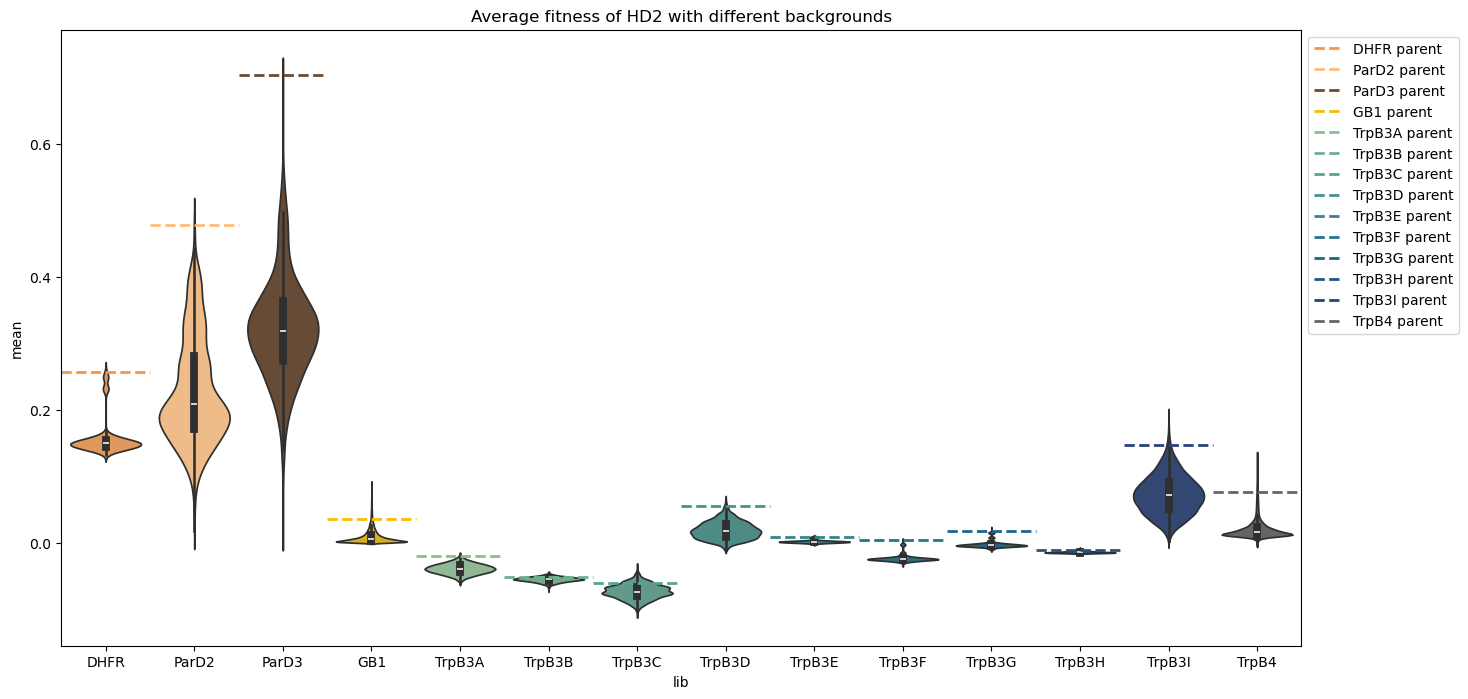

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

all_df = pd.concat(all_dfs)

plt.figure(figsize=(16, 8))  # Adjust the size as needed
ax = sns.violinplot(x="lib", y="mean", data=all_df, hue="lib", palette=LIB_COLORS)

for lib in LIB_INFO_DICT.keys():

    # Find the position of the violin to add the line to
    position = all_df["lib"].unique().tolist().index(lib)
    ax.axhline(
        wt_mean[lib],
        color=LIB_COLORS[lib],
        linestyle="--",
        linewidth=2,
        xmin=position / len(LIB_INFO_DICT),
        xmax=(position + 1) / len(LIB_INFO_DICT),
        label=f"{lib} parent",
    )

ax.set_title("Average fitness of HD2 with different backgrounds")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
# Optional: Set x-axis labels to rotate for better visibility
# plt.xticks(rotation=45)